In [1]:
from transformers import DistilBertTokenizer, DistilBertModel
from desc_trainer import Embedder
from trainer import *
from tqdm import tqdm
import pandas as pd
import numpy as np

In [5]:
embd = Embedder.load_from_checkpoint('lightning_logs/version_31/checkpoints/epoch=11-step=13752.ckpt', a2v_dim=50).cuda()

In [6]:
metadata = pd.read_csv('data/Top 2000/t2k_metadata.csv', index_col=0)

In [7]:
TOKENIZER = RobertaTokenizer.from_pretrained('tokenizer/')
metadata.loc['Description'] = metadata.loc['Description'].apply(
            TOKENIZER, max_length=512, return_tensors='pt', padding='max_length', return_attention_mask=True, is_split_into_words=False
        )

In [8]:
total_stocks = len(metadata.columns)
embeddings = pd.DataFrame(data=np.zeros((30, total_stocks)), columns=metadata.columns)

for stock in tqdm(metadata.columns, total=total_stocks):
    desc = metadata.loc['Description', stock]
    embeddings[stock] = embd(desc['input_ids'].cuda(), desc['attention_mask'].cuda()).detach().cpu().numpy()[0]

100%|██████████| 1877/1877 [01:07<00:00, 27.61it/s]


In [14]:
embeddings.head()

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,ZBRA,ZD,ZI,ZION,ZM,ZNTL,ZS,ZTS,ZUO,ZWS
0,1.64952,1.622779,1.623286,1.705369,1.644963,1.703748,1.660426,1.757477,1.659551,1.657847,...,0.602389,1.636478,0.623753,1.635804,1.633683,1.682483,1.629536,1.674784,1.632058,1.708075
1,1.64952,1.622779,1.623286,1.705369,1.644963,1.703748,1.660426,1.757477,1.659551,1.657847,...,0.602389,1.636478,0.623753,1.635804,1.633683,1.682483,1.629536,1.674784,1.632058,1.708075
2,1.64952,1.622779,1.623286,1.705369,1.644963,1.703748,1.660426,1.757477,1.659551,1.657847,...,0.602389,1.636478,0.623753,1.635804,1.633683,1.682483,1.629536,1.674784,1.632058,1.708075
3,1.64952,1.622779,1.623286,1.705369,1.644963,1.703748,1.660426,1.757477,1.659551,1.657847,...,0.602389,1.636478,0.623753,1.635804,1.633683,1.682483,1.629536,1.674784,1.632058,1.708075
4,1.64952,1.622779,1.623286,1.705369,1.644963,1.703748,1.660426,1.757477,1.659551,1.657847,...,0.602389,1.636478,0.623753,1.635804,1.633683,1.682483,1.629536,1.674784,1.632058,1.708075


In [9]:
from sklearn.manifold import TSNE
m = TSNE(n_components=2)
reduced = m.fit_transform(embeddings.T).T
reduced = pd.DataFrame(data=reduced, columns=metadata.columns)

In [10]:
reduced.head()

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,ZBRA,ZD,ZI,ZION,ZM,ZNTL,ZS,ZTS,ZUO,ZWS
0,-4.407402,31.602106,26.610235,-14.430198,-1.957934,-12.884168,-19.423319,-53.550148,-18.595999,-16.977465,...,67.668076,6.781349,58.979156,6.194372,13.506723,-32.191212,2.080826,-26.440712,19.566809,-20.773281
1,32.806511,-7.181813,-3.457312,4.821726,17.908026,3.109756,-45.080151,2.422131,-44.383842,-42.450443,...,-4.595682,0.794979,-21.401789,3.592692,43.353783,22.679253,-21.459141,28.822851,39.887627,5.875625


<Axes: xlabel='0', ylabel='1'>

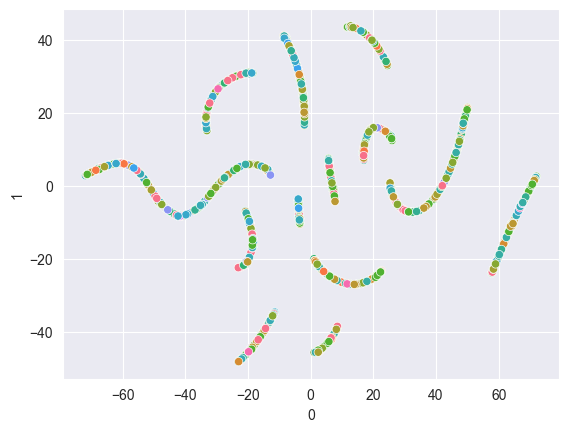

In [12]:
import seaborn as sns
sns.scatterplot(x=reduced.iloc[0], y=reduced.iloc[1], hue=metadata.loc['Sector'], legend=False)

<Axes: xlabel='0', ylabel='1'>

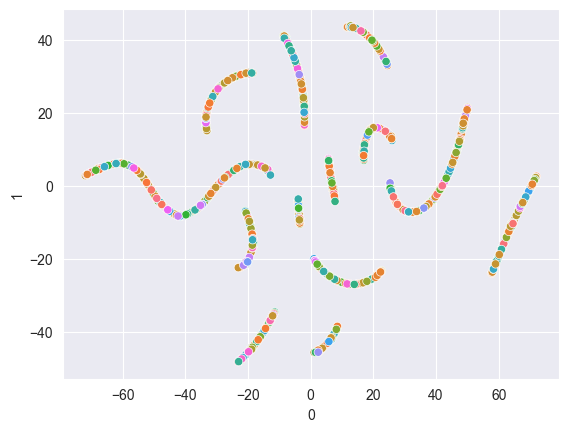

In [13]:
sns.scatterplot(x=reduced.iloc[0], y=reduced.iloc[1], hue=metadata.loc['Industry'], legend=False)

In [13]:
embeddings.to_csv('data/Top 2000/t2k_embeddings.csv')

In [10]:
embeddings = pd.DataFrame(embeddings.T, columns=metadata.columns)

In [12]:
dist = [sum(np.square(embeddings[stock] - embeddings['AAPL'])) for stock in embeddings.columns]
idx = np.argsort(dist)
embeddings.columns[idx][:10]

Index(['AAPL', 'CDNS', 'EVR', 'TEN', 'ATR', 'MBUU', 'UNM', 'CCOI', 'AMZN',
       'MDB'],
      dtype='object')

In [1]:
embeddings

NameError: name 'embeddings' is not defined